**Step 1: Reading and Understanding the Data**

In [141]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# using google colab for Data building
from google.colab import files

# uploading file
uploaded = files.upload()

# reading day.csv file
df = pd.read_csv('day.csv')

# checking top 10 row data
df.head(10)


Saving day.csv to day (4).csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [142]:
# checking shape of data

df.shape


(730, 16)

In [143]:
# describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [144]:
# getting info for the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
# checking for null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [146]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

df.head(10)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [147]:
# copying the Dataframe into new

df_copy = df.copy()

# dropping duplicates from copied dataframe
df_copy.drop_duplicates(inplace=True)
df_copy.shape

(730, 16)

As we can see from above, the shape of copied dataframe df_copy is same as original dataframe df even after removing duplicates. This means that there are no duplicates in the dataframe

In [148]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df_copy.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df_copy.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [149]:
# updating the season column
df_copy.season = df_copy.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# updating the month column
df_copy.month = df_copy.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# updating the weekday column
df_copy.weekday = df_copy.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# updating the weathersit column
df_copy.weathersit = df_copy.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# printing top 10 rows
print(df_copy.head(10))

   season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   
5  spring     0   jan        0     thu           1      Clear   8.378268   
6  spring     0   jan        0     fri           1      Misty   8.057402   
7  spring     0   jan        0     sat           0      Misty   6.765000   
8  spring     0   jan        0     sun           0      Clear   5.671653   
9  spring     0   jan        0     mon           1      Clear   6.184153   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  

**Step 2: Visualising the Data**

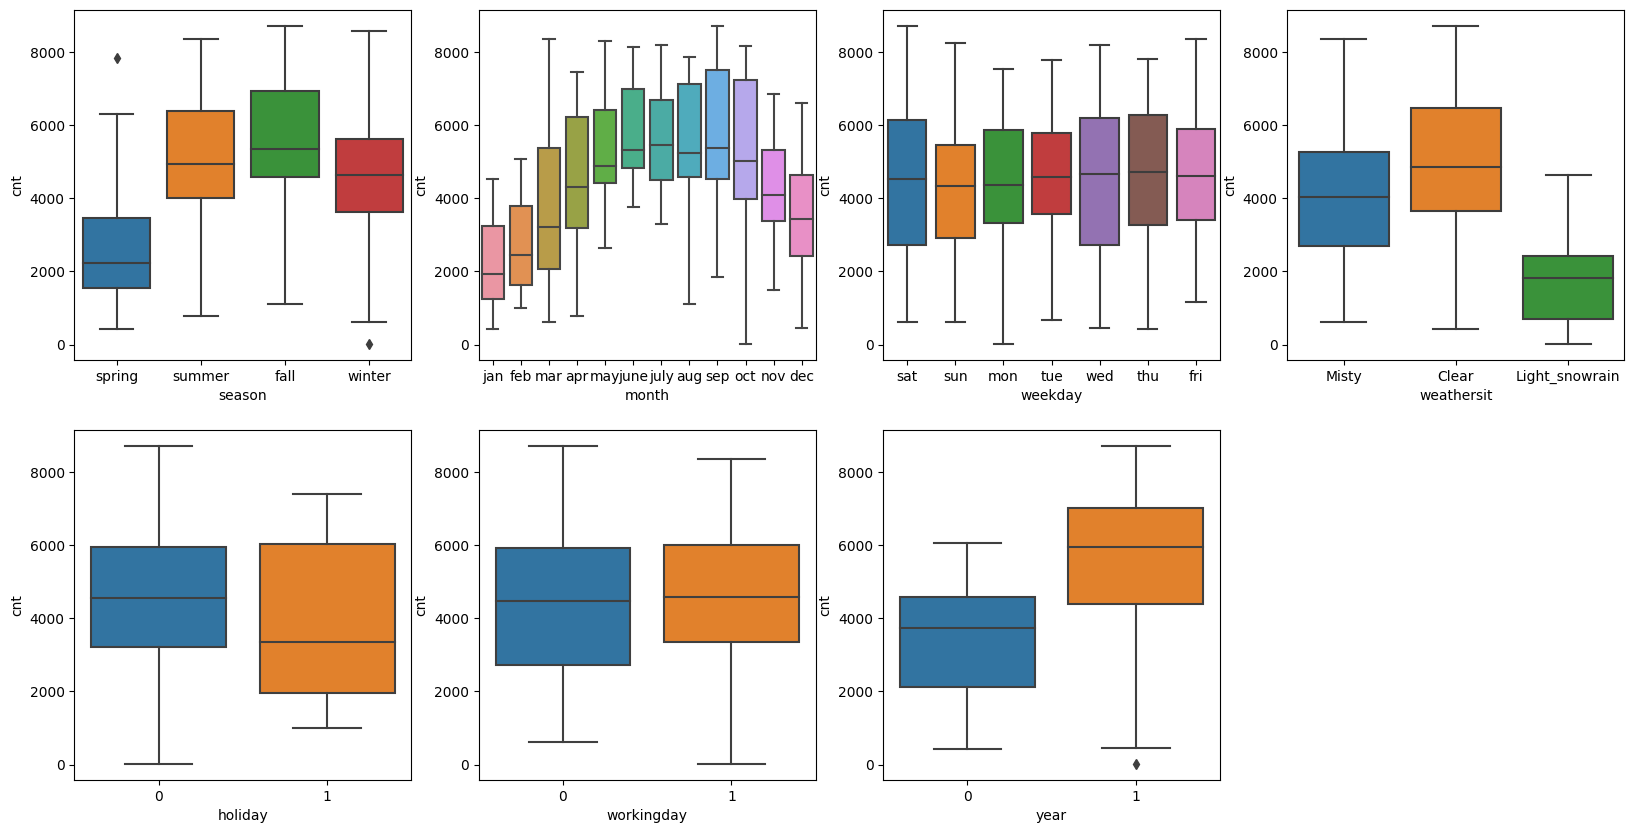

In [150]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_copy)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_copy)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_copy)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_copy)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_copy)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_copy)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_copy)
plt.show()

In [151]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y = 'cnt',data=df_copy)
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = 'cnt',data=df_copy, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()




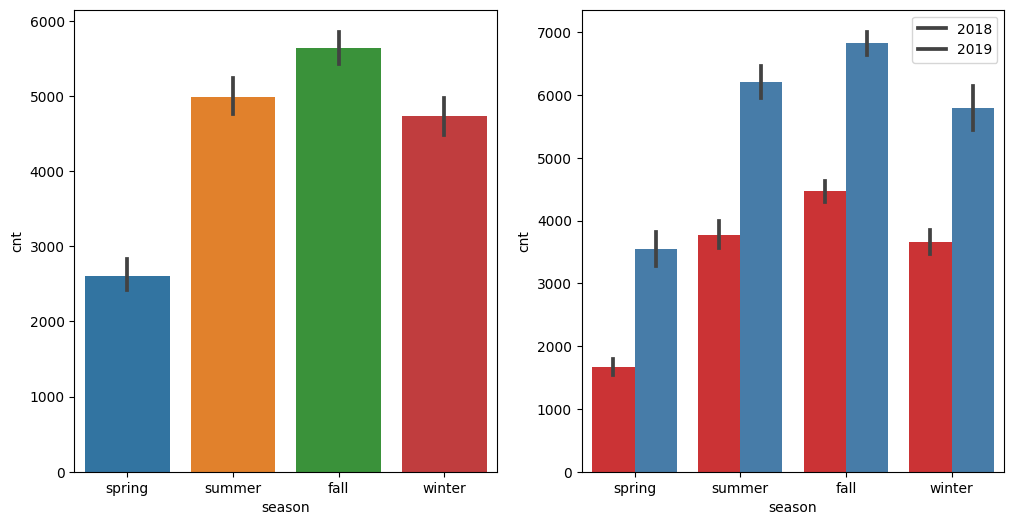

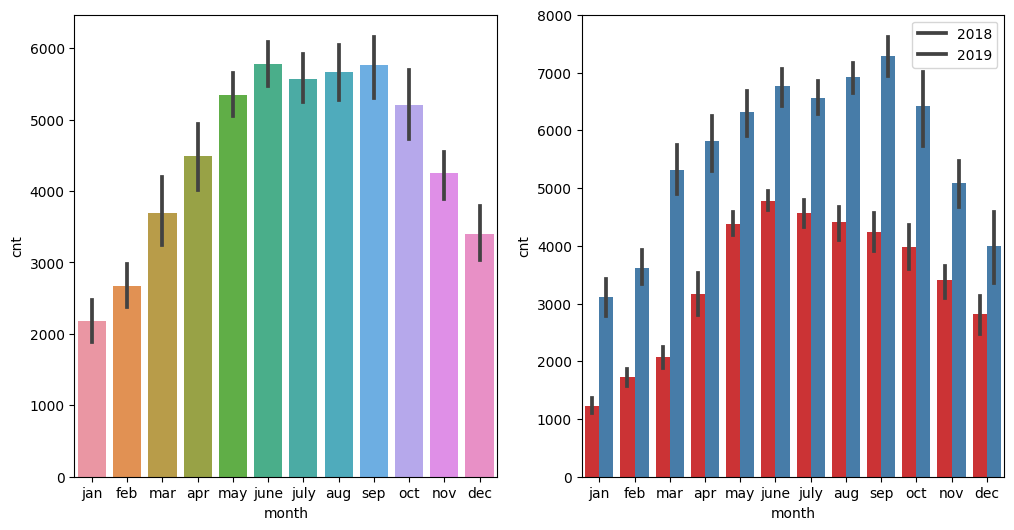

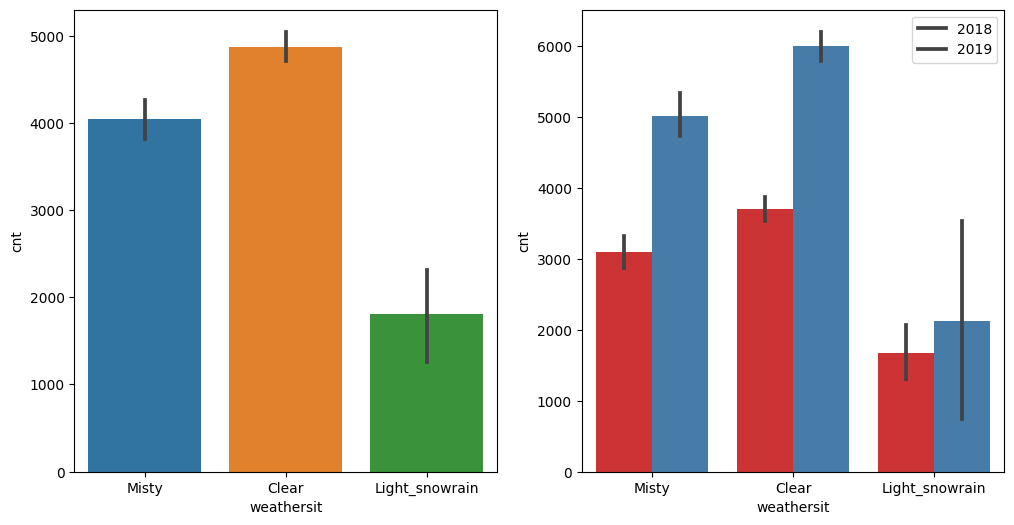

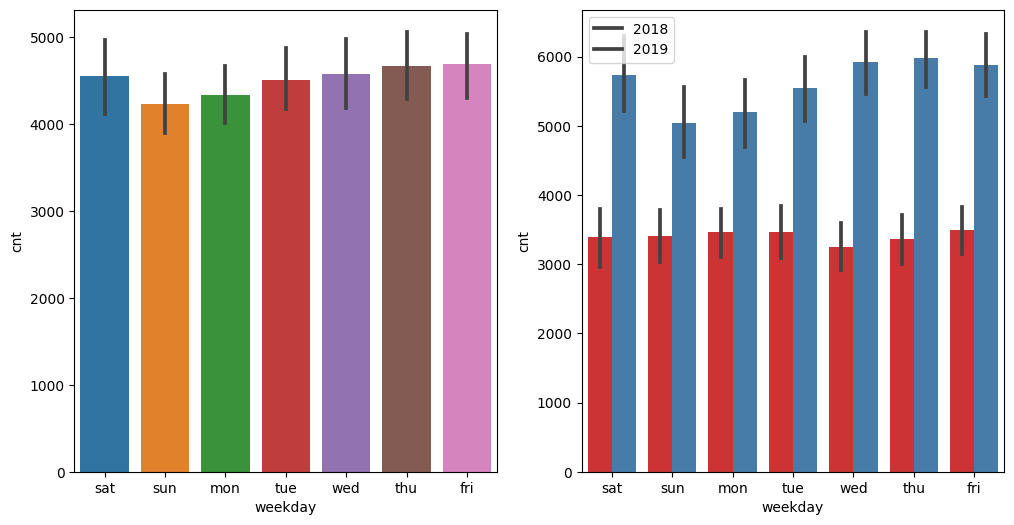

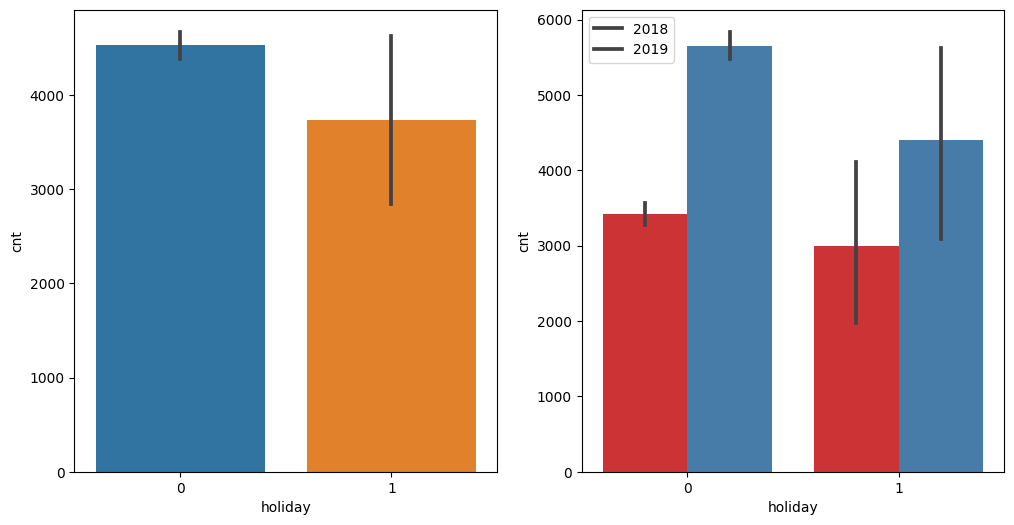

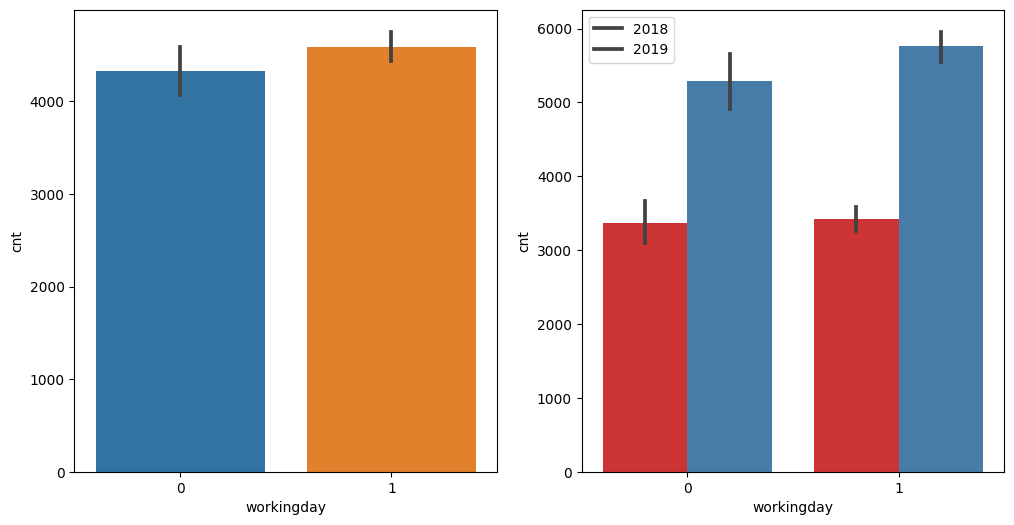

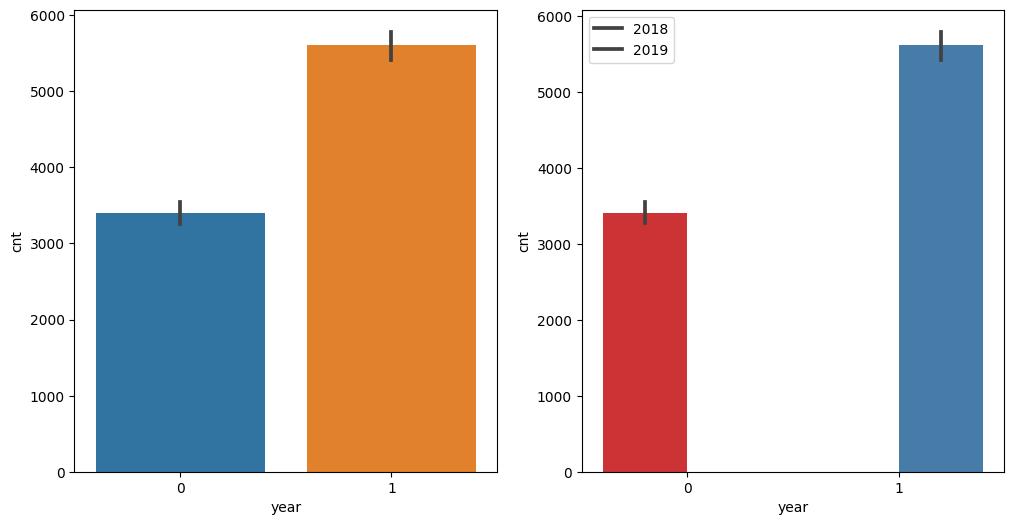

In [152]:
# plotting visualization for season column
plot_cat_columns('season')

# plotting visualization for month column
plot_cat_columns('month')

# plotting visualization for season column
plot_cat_columns('weathersit')

# plotting visualization for season column
plot_cat_columns('weekday')

# plotting visualization for season column
plot_cat_columns('holiday')

# plotting visualization for season column
plot_cat_columns('workingday')

# plotting visualization for season column
plot_cat_columns('year')

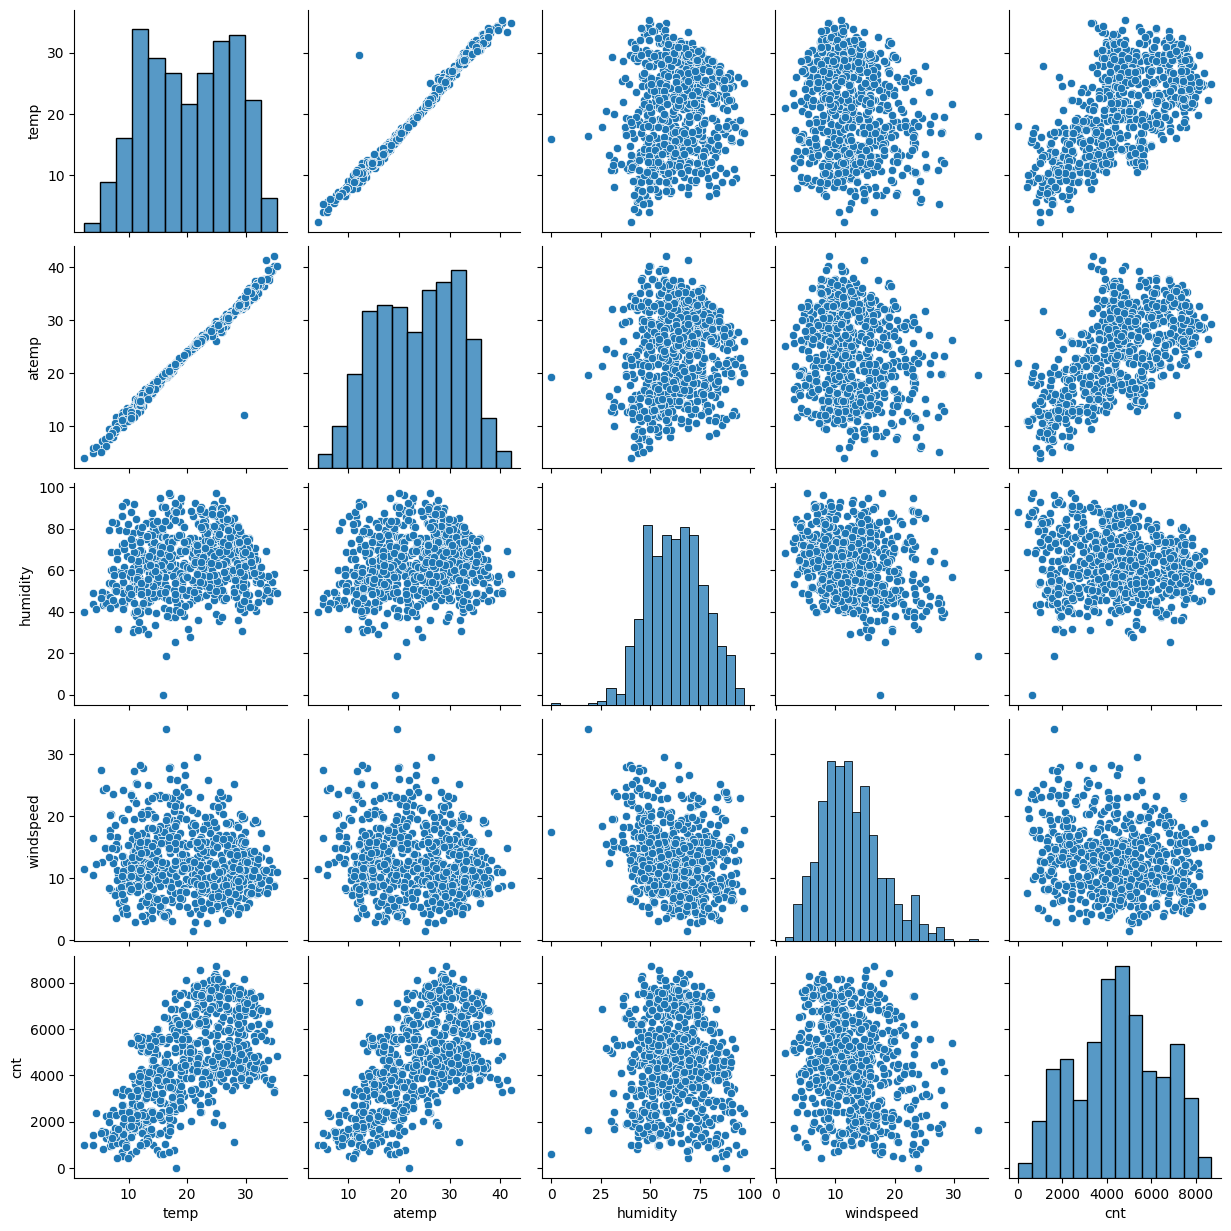

In [153]:
# visualizing the numerical columns

sns.pairplot(data=df_copy,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

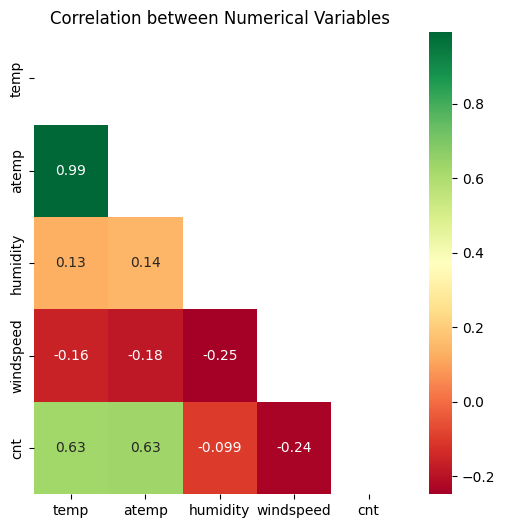

In [154]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df_copy[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df_copy[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Because of multicolinearity both the parameters cannot be used. So we will check the VIF and p-value with respect to other vairables to choose the correct/better parameter.

**Step 3: Data Preparation**

In [155]:
# Creating Dummmy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df_copy.month,drop_first=True)
weekdays_df=pd.get_dummies(df_copy.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df_copy.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df_copy.season,drop_first=True)

df_copy.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [156]:
# Merging  the dataframe, with the dummy variable dataset.

df_new = pd.concat([df_copy,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,...,0,0,1,0,0,0,0,1,0,0
6,spring,0,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,...,0,0,0,0,0,0,1,1,0,0
7,spring,0,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,...,1,0,0,0,0,0,1,1,0,0
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,...,0,1,0,0,0,0,0,1,0,0
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,...,0,0,0,0,0,0,0,1,0,0


In [157]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [158]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

df_new.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
# checking the shape of new dataframe

df_new.shape

(730, 30)

In [160]:
# checking the column info of new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

**Step 4: Splitting the Data into Training and Testing Sets**

In [161]:
# splitting the dataframe into Train and Test data set

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

# check the shape of training datatset
df_train.shape

(510, 30)

In [162]:
# check the shape of testing datatset
df_test.shape

(220, 30)

In [163]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# verifying the head of dataset before scaling.
df_train.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.09770,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0
580,1,0,0,32.526653,37.56335,61.3333,17.249686,6824,1,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,26.103347,29.79875,69.7917,8.208304,7424,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,19.543347,23.51585,42.7917,7.959064,6196,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,18.996653,22.85190,56.9167,11.250104,4367,0,0,...,0,0,0,0,1,0,1,0,1,0
455,1,0,0,17.459153,20.86435,67.6250,11.541889,6041,0,0,...,0,1,0,0,0,0,1,0,1,0


In [164]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# verifying the head after appying scaling.
df_train.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,...,0,0,0,0,1,0,1,0,1,0
455,1,0,0,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,...,0,1,0,0,0,0,1,0,1,0


In [165]:
# describing the dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


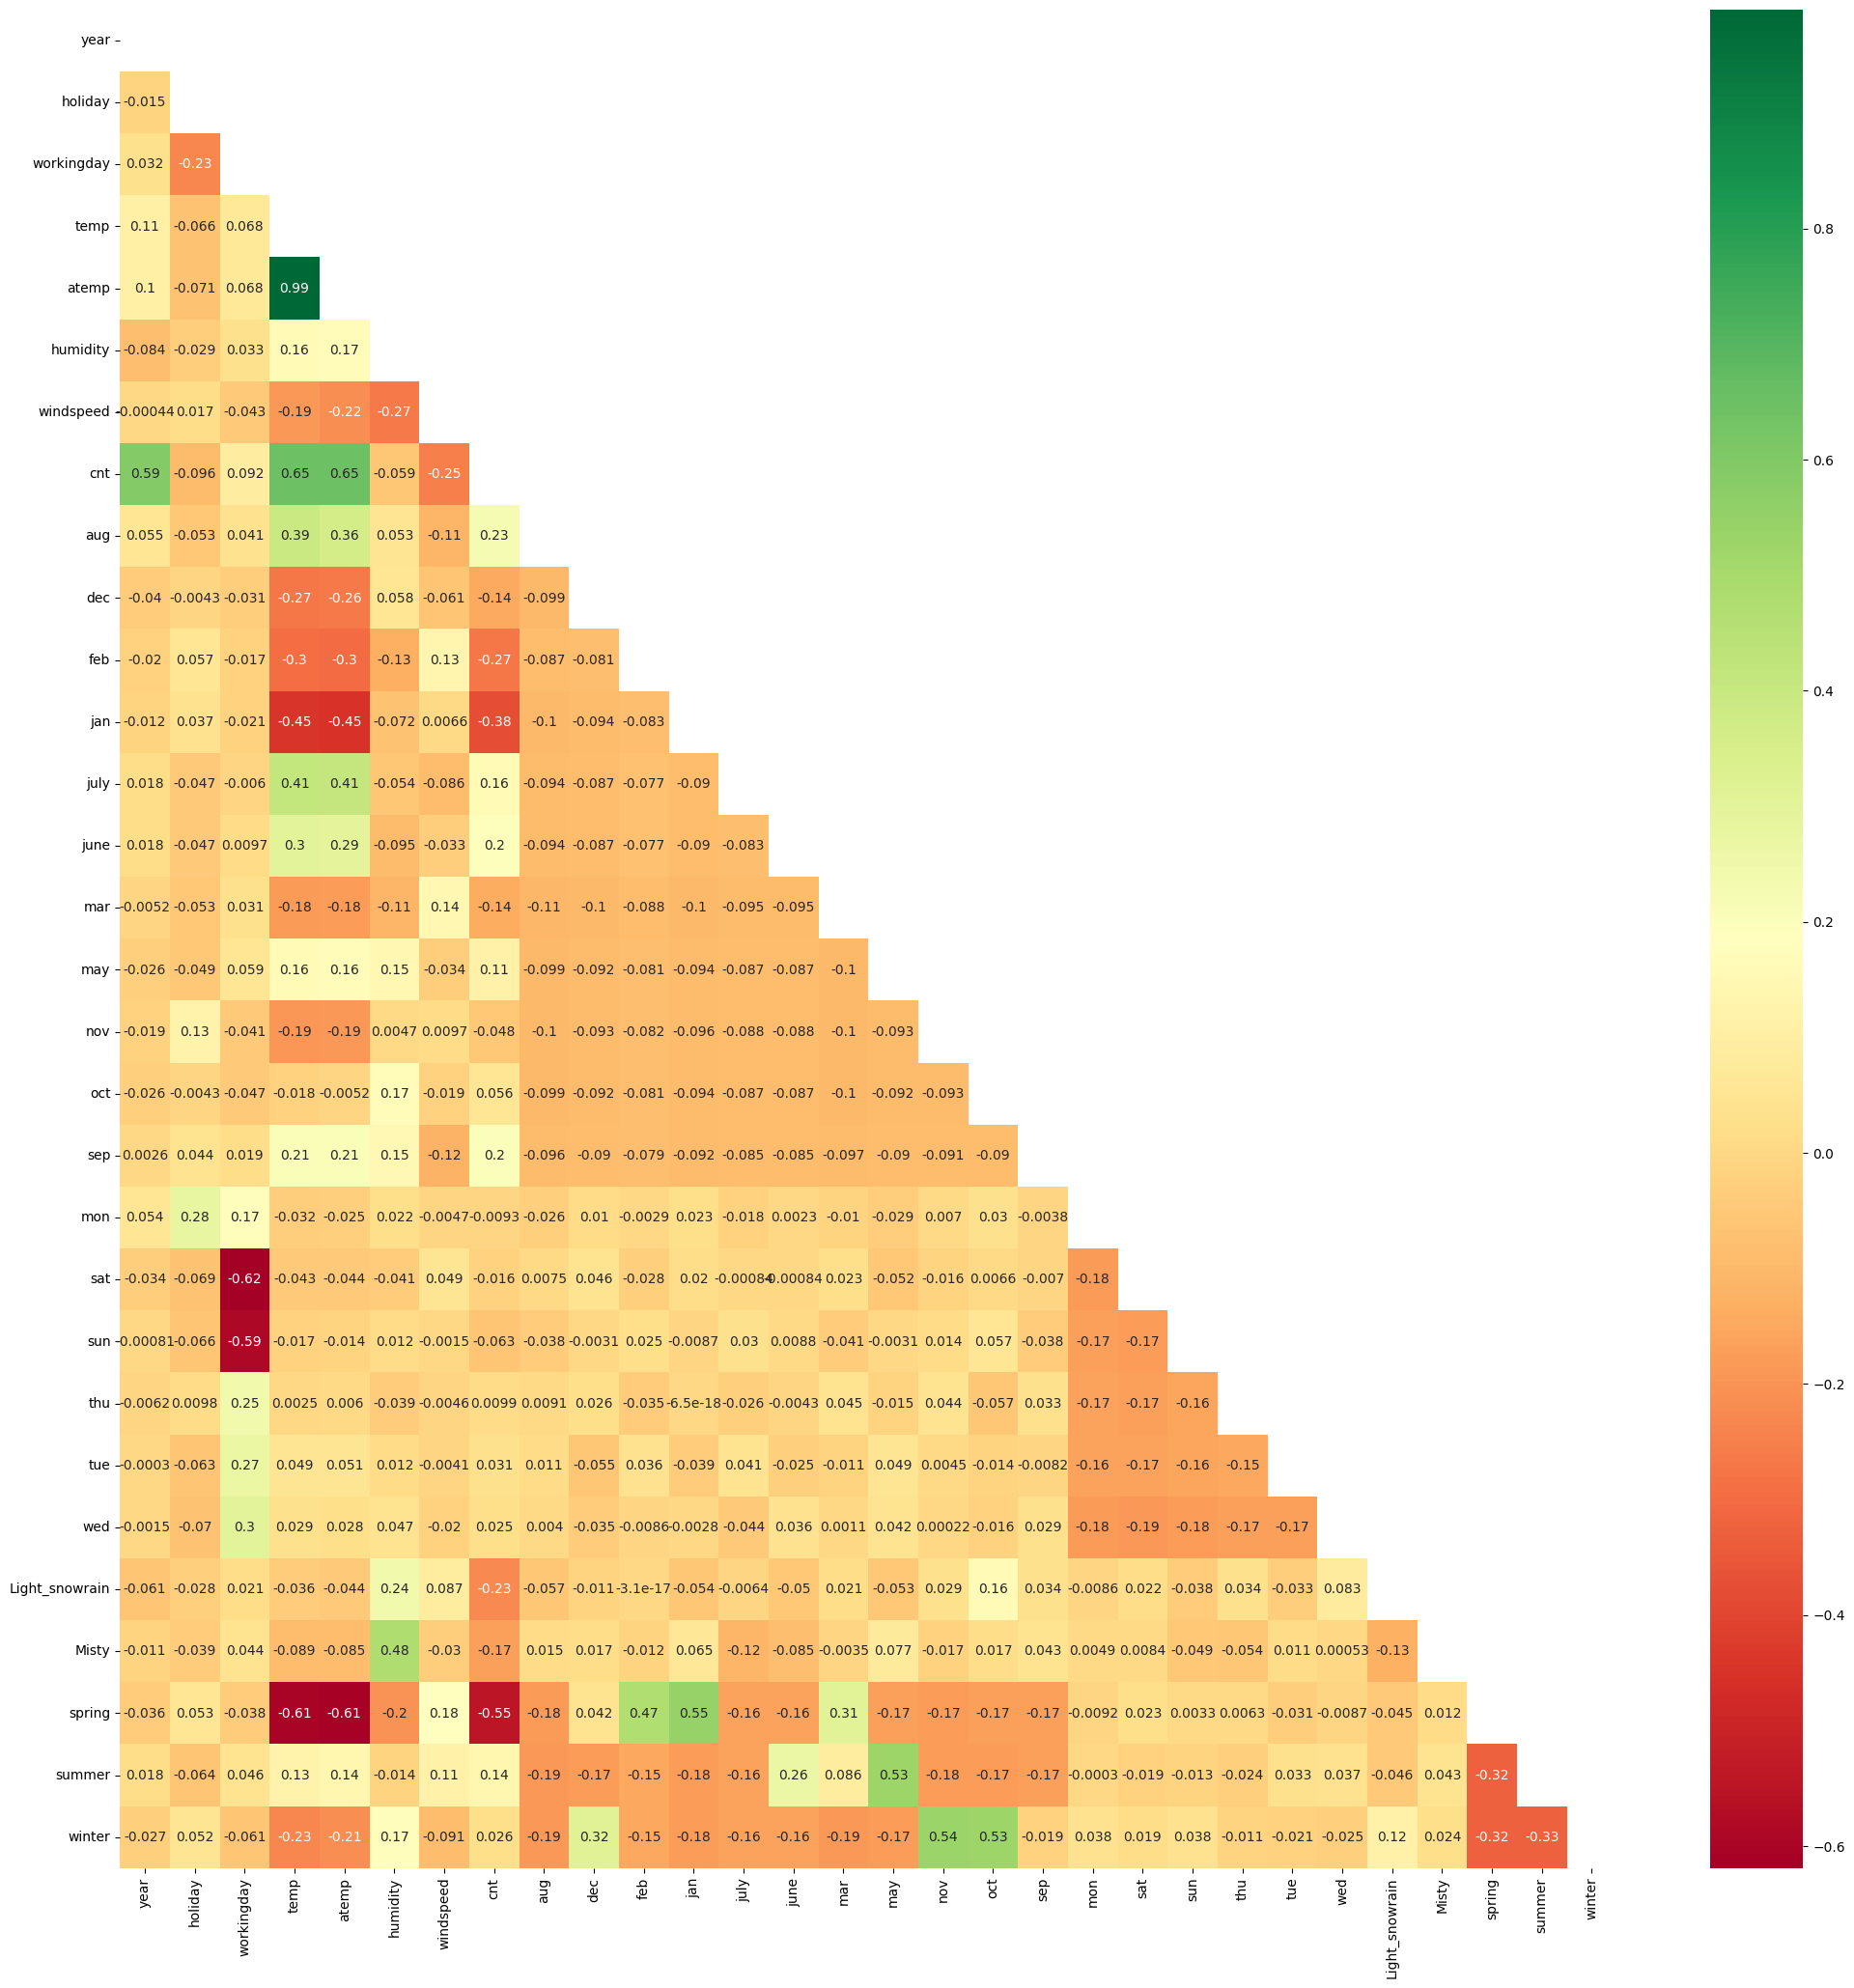

In [166]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

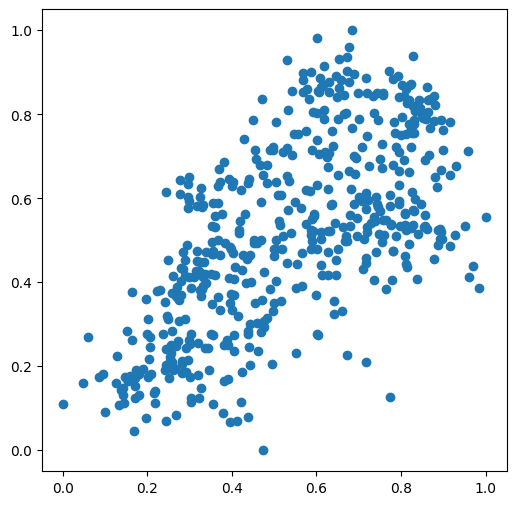

In [167]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

**Visualization confirms the positive correlation between temp and cnt.**

In [168]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [169]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train


# Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)


#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [170]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'dec',
       'jan', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [171]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [176]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [177]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [178]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,376.20
3,atemp,366.79
4,humidity,30.37
5,windspeed,4.89
11,spring,4.32
13,winter,3.41
12,summer,2.59
10,Misty,2.31
0,year,2.09
7,jan,1.73


**Temp, atemp and humidity shows high VIF**

In [179]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          4.12e-187
Time:                        22:47:57   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2923      0.035      8.

In [180]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity','temp','atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,3.50
8,spring,2.71
10,winter,1.88
9,summer,1.86
0,year,1.77
4,jan,1.64
7,Misty,1.52
3,dec,1.29
5,sep,1.14
6,Light_snowrain,1.08


VIF values seems to be good now. But we will see if we can reduce further ?

In [181]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          7.37e-157
Time:                        22:51:20   Log-Likelihood:                 427.37
No. Observations:                 510   AIC:                            -830.7
Df Residuals:                     498   BIC:                            -779.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5867      0.014     41.

We can cosider the above model i.e lr_2, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 162.4 (which is greater than 1) and the p-value of 7.37e-157 i.e almost equals to zero, states that the overall model is significant

In [182]:
# Checking the parameters and their coefficient values
lr_2.params

const             0.586738
year              0.246639
holiday          -0.101724
windspeed        -0.196261
dec              -0.077016
jan              -0.115382
sep               0.070212
Light_snowrain   -0.303630
Misty            -0.085229
spring           -0.244993
summer           -0.040043
winter           -0.057034
dtype: float64

**Step 6: Residual Analysis of the train data and validation**

In [183]:
X_train_lm_2

,const,year,holiday,windspeed,dec,jan,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.431816,1,0,0,0,1,0,0,1
79,1.0,0,0,0.529881,0,0,0,0,1,0,1,0


In [184]:
y_train_pred = lr_2.predict(X_train_lm_2)

Normality of error terms

<ipython-input-185-5853e52f8842>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

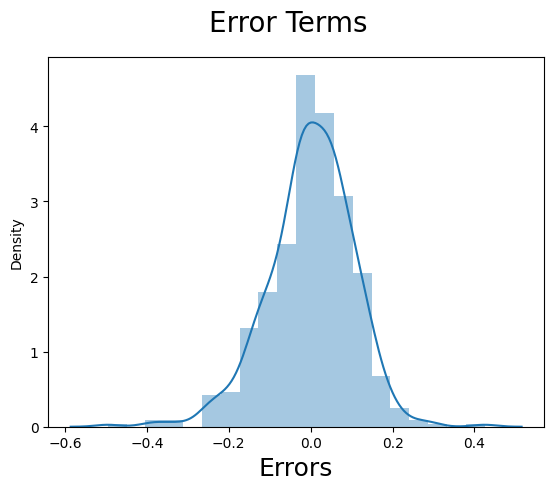

In [185]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

**Multi Colinearity**

In [186]:
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,3.50
8,spring,2.71
10,winter,1.88
9,summer,1.86
0,year,1.77
4,jan,1.64
7,Misty,1.52
3,dec,1.29
5,sep,1.14
6,Light_snowrain,1.08


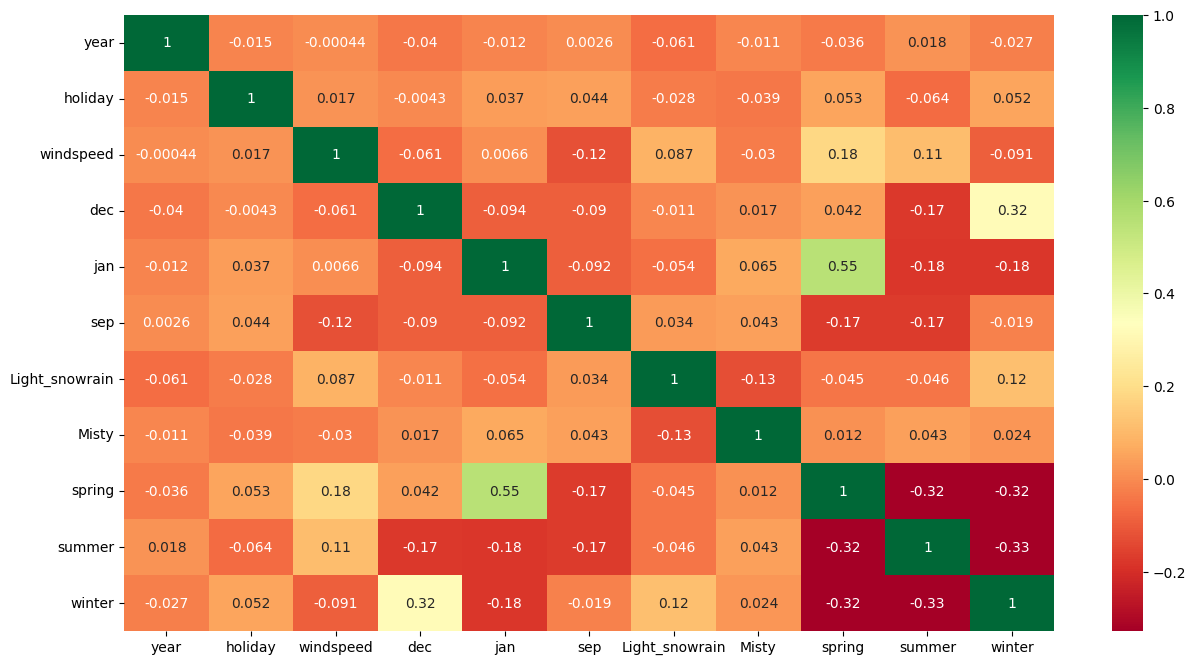

In [187]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

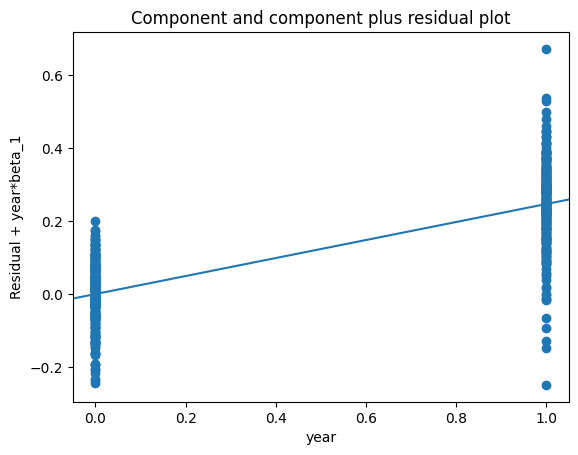

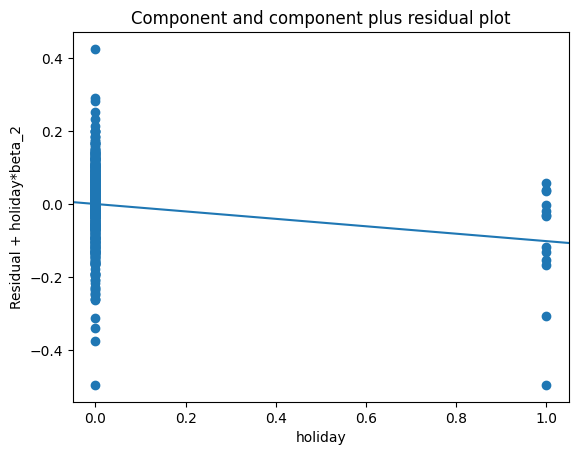

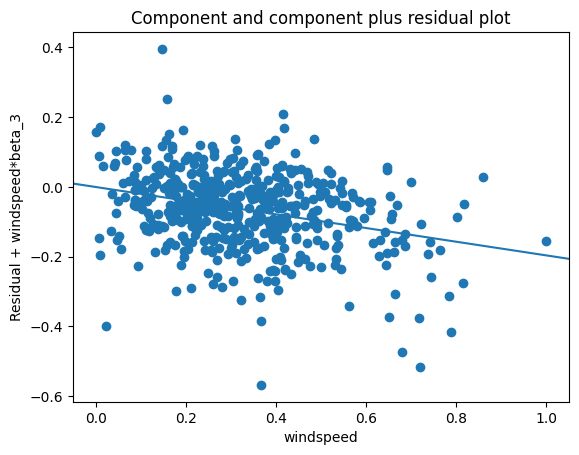

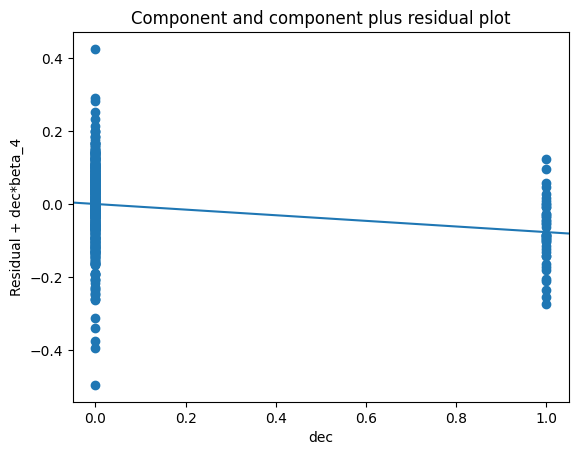

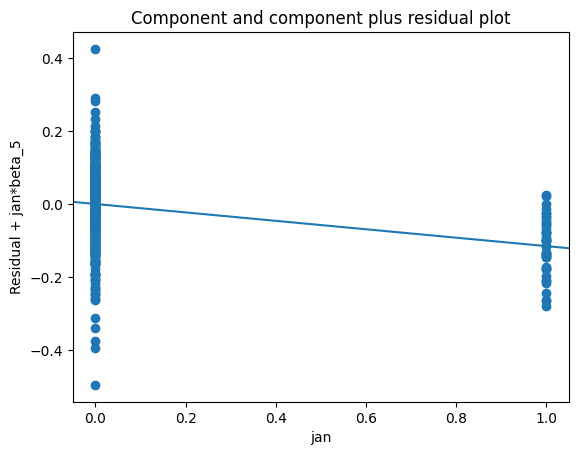

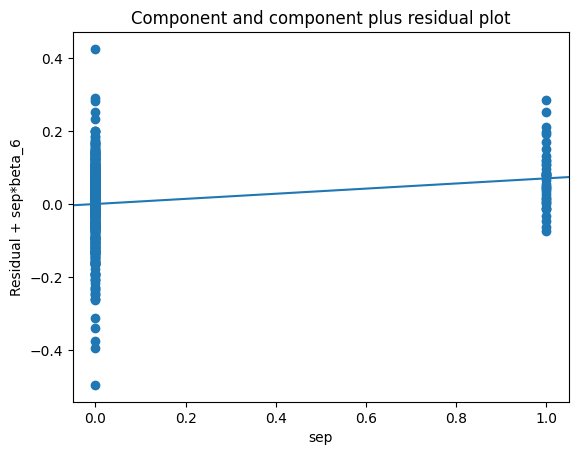

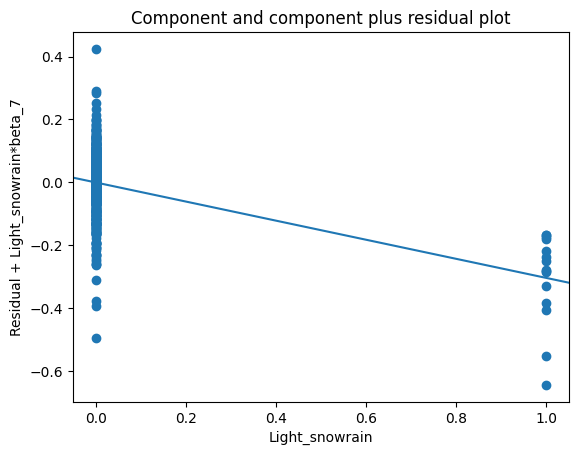

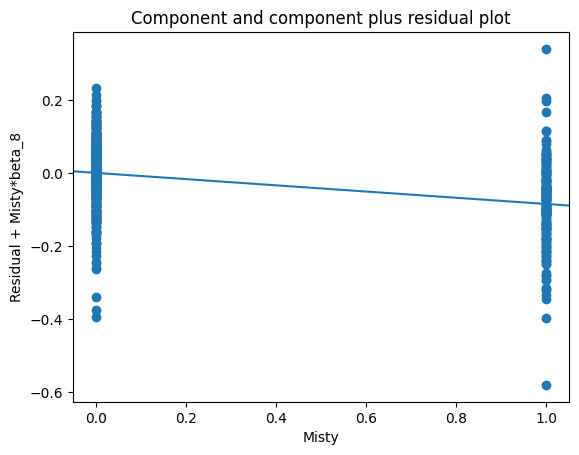

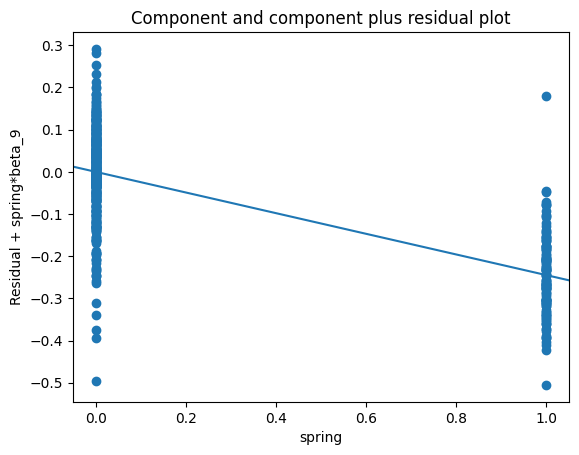

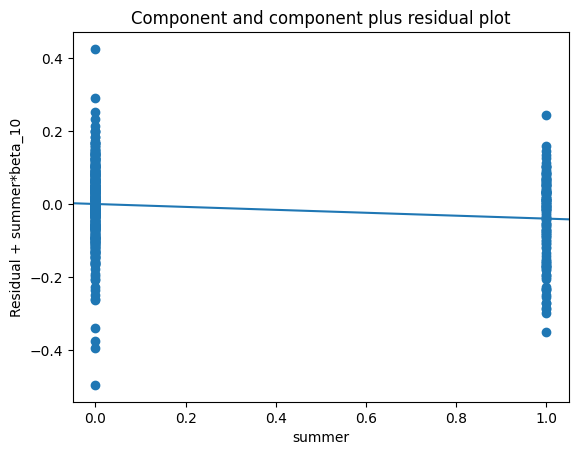

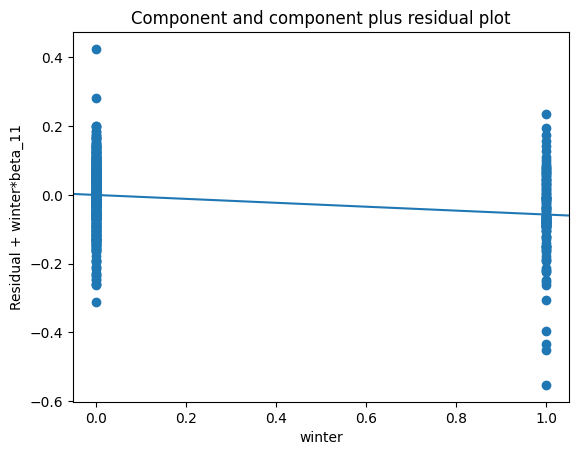

In [189]:
# Linear relationship validation using CCPR plot


sm.graphics.plot_ccpr(lr_2, 'year')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'holiday')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'dec')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'jan')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'Light_snowrain')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'Misty')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'spring')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'winter')
plt.show()

**Homoscedasticity**

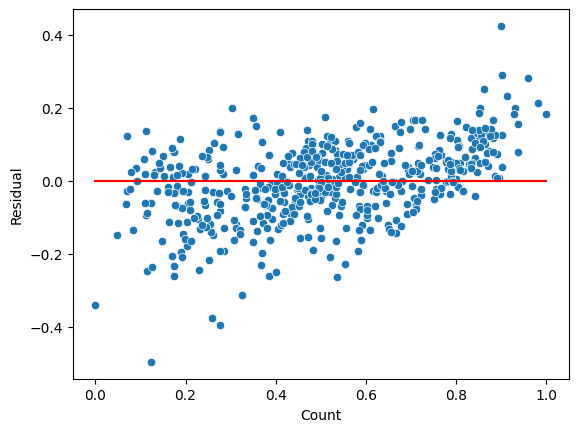

In [193]:
y_train_pred = lr_2.predict(X_train_lm_2)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

**Independence of residuals**
Durbin-Watson value of final model lr_2 is 1.969, which signifies there is no autocorrelation.

**Step 7: Making Predictions Using the Final Model**

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model (2nd one).

In [194]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [195]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
y_test = df_test.pop('cnt')
X_test = df_test

In [197]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_2 = sm.add_constant(X_test)

In [198]:
y_pred = lr_2.predict(X_test_lm_2)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7489

**Step 8: Model Evaluation**

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

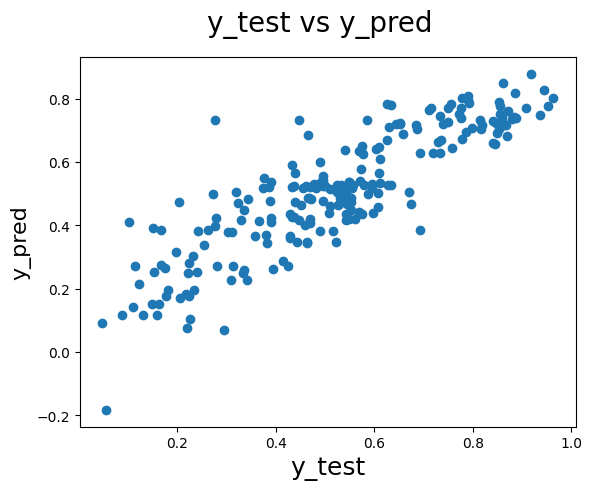

In [199]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [200]:
round(lr_2.params,4)

const             0.5867
year              0.2466
holiday          -0.1017
windspeed        -0.1963
dec              -0.0770
jan              -0.1154
sep               0.0702
Light_snowrain   -0.3036
Misty            -0.0852
spring           -0.2450
summer           -0.0400
winter           -0.0570
dtype: float64

In [201]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7356


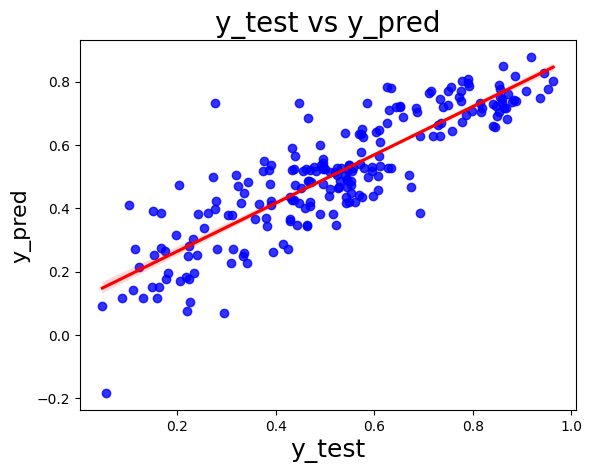

In [202]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparision between Training and Testing dataset:**
- Train dataset R^2          : 0.782
- Test dataset R^2           : 0.7489
- Train dataset Adjusted R^2 : 0.777
- Test dataset Adjusted R^2  : 0.7356

**Demand of bikes depend on year, holiday, windspeed, dec, jan, sep, Light_snowrain, Misty, spring, summer and winter.**